In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("ads_data.csv")
df

,Advertising Cost (USD),Sales Revenue (USD)
0,784,5167.683485
1,659,4736.040926
2,729,4799.105662
3,292,2307.039663
4,935,5917.849078
5,863,5753.385395
6,807,5348.687786
7,459,3390.113449
8,109,841.300662
9,823,5324.660476


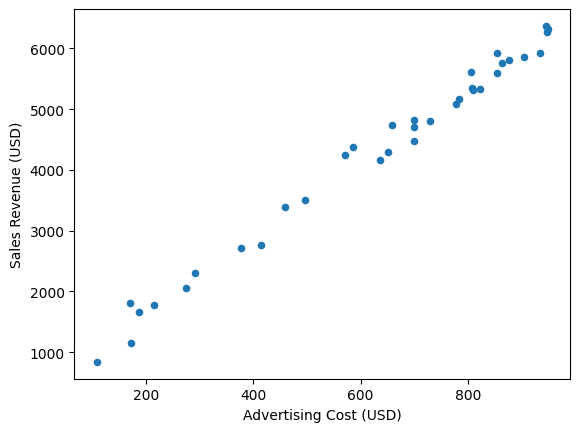

In [8]:
df.plot.scatter(
    x = "Advertising Cost (USD)",
    y = "Sales Revenue (USD)"
)
plt.show()

In [10]:
#Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

x = df.iloc[:, 0:1] #Chỉ định x là cột Advertising Cort
y = df.iloc[:, 1:2] #Chỉ định y là cột sales revenue

# Huấn luyện mô hình
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# y = ax + b
# Hệ số góc a
model.coef_

array([[6.14733189]])

In [ ]:
# Hệ số chặn b
model.intercept_ # => y = 6.14733189x + 423.64529827

array([423.64529827])

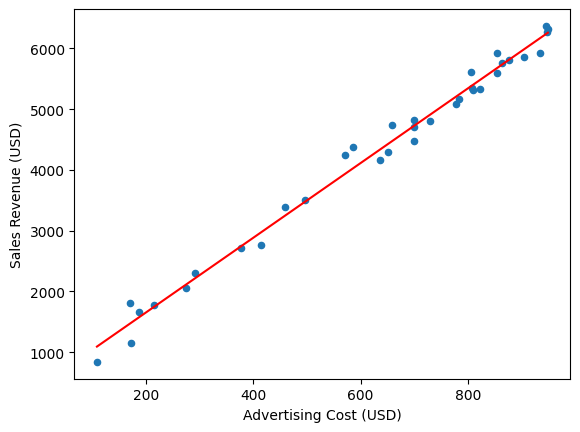

In [14]:
df.plot.scatter(
    x = "Advertising Cost (USD)",
    y = "Sales Revenue (USD)"
)

# y = ax + b
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_line, color='red', label='Best fit line')
plt.show()

In [15]:
model.predict(pd.DataFrame([600]))

c:\Users\pc\OneDrive\Desktop\CSA15\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4112.04443118]])

In [ ]:
model.predict(pd.DataFrame([1000,2000,3000])) #Khảo sát, dự đoán

c:\Users\pc\OneDrive\Desktop\CSA15\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 6570.97718645],
       [12718.30907463],
       [18865.64096281]])

In [ ]:
# Kiểm tra hệ số tương quan
df["Sales Revenue (USD)"].corr(df["Advertising Cost (USD)"]) #Hệ số tương quan rất mạnh, x tăng thì y cũng tăng mạnh

np.float64(0.9940740630509901)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score #Đánh giá chỉ số lỗi, chỉ số đúng là bao nhiêu

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 1) (28, 1)
(7, 1) (7, 1)


In [21]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = new_model.predict(x_test)

In [26]:
new_model.coef_, new_model.intercept_ # a, b

(array([[6.07996297]]), array([477.1814076]))

In [24]:
# Tính lỗi của mô hình
mse = mean_squared_error(y_test, y_pred)
mse

53852.56448015925

In [ ]:
# Đánh giá độ khớp của mô hình
r2 = r2_score(y_test, y_pred) #Đánh giá 2 giá trị này có khớp không (kiểm tra và dự đoán)
r2

0.9696953486116257

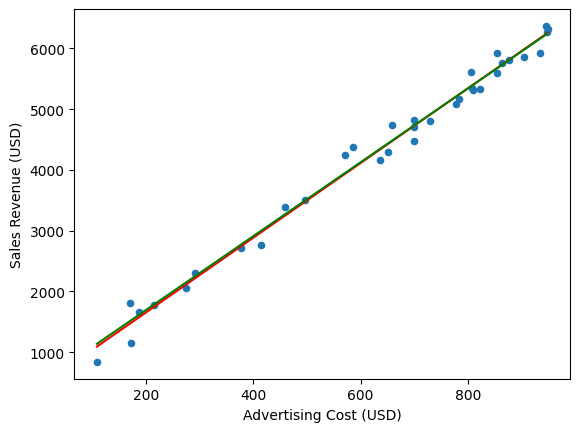

In [27]:
df.plot.scatter(
    x = "Advertising Cost (USD)",
    y = "Sales Revenue (USD)"
)

# y = ax + b
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_line, color='red', label='Best fit line')

new_y_line = new_model.coef_[0] * x_line + new_model.intercept_
plt.plot(x_line, new_y_line, color="green", label='New best fit line')
plt.show()